## Observations and Insights 

In [336]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete=pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID","Mouse ID"])
# Display the data table for preview
print(mouse_study_complete)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [337]:
# Checking the number of mice.
total_mice=len(mouse_study_complete['Mouse ID'].unique())
total_mice


249

In [338]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=mouse_study_complete[mouse_study_complete.duplicated()]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [339]:
# Optional: Get all the data for the duplicate mouse ID. 



In [340]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
without_duplicate_mouse=mouse_study_complete.drop_duplicates()
without_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [341]:
total_mice=len(without_duplicate_mouse['Mouse ID'].unique())
total_mice

249

In [342]:
without_duplicate_mouse[(without_duplicate_mouse["Mouse ID"]== "g989")]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1
918,g989,Propriva,Female,21,26,25,56.045564,1


In [343]:
# Checking the number of mice in the clean DataFrame.
new_total_mice=len(without_duplicate_mouse['Mouse ID'].unique())
new_total_mice

249

## Summary Statistics

In [344]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

without_duplicate_mouse[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  160.0  52.368318  6.502160  45.000000  47.107256   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.259803  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [345]:
mean_tumor=without_duplicate_mouse[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
mean_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.368318
Ramicane,40.216745
Stelasyn,54.233149


In [346]:
median_tumor=without_duplicate_mouse[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
median_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [347]:
variance_tumor=without_duplicate_mouse[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
variance_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.278090
Ramicane,23.486704
Stelasyn,59.450562


In [348]:
standard_deviation_tumor=without_duplicate_mouse[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
standard_deviation_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.502160
Ramicane,4.846308
Stelasyn,7.710419


In [349]:
sem_tumor=without_duplicate_mouse[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
sem_tumor

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.514041
Ramicane,0.320955
Stelasyn,0.573111


In [350]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
dataframe=pd.merge(mean_tumor,median_tumor, how="inner", on=["Drug Regimen"])
dataframe=pd.merge(dataframe,variance_tumor, how="inner", on=["Drug Regimen"])
dataframe=pd.merge(dataframe,standard_deviation_tumor, how="inner", on=["Drug Regimen"])
dataframe=pd.merge(dataframe,sem_tumor, how="inner", on=["Drug Regimen"])
dataframe=dataframe.rename(columns={"Tumor Volume (mm3)_x":'Mean', "Tumor Volume (mm3)_y":'Median',"Tumor Volume (mm3)":'SEM'})
print(dataframe)

# Using the aggregation method, produce the same summary statistics in a single line


                   Mean     Median       Mean    Median       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

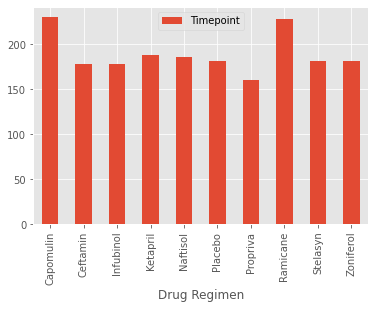

In [351]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count=without_duplicate_mouse.groupby(['Drug Regimen']).count().plot.bar(y="Timepoint")
plt.show()


['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


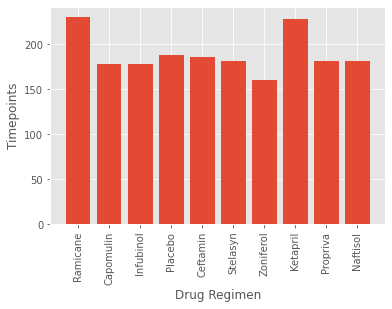

In [352]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs=mouse_study_complete["Drug Regimen"].unique()
print(drugs)
timepoints=without_duplicate_mouse.groupby(["Drug Regimen"]).count()["Timepoint"]
x=list(range(len(timepoints)))
plt.bar(x,timepoints)
plt.xticks(x,drugs,rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

<AxesSubplot:ylabel='Mouse ID'>

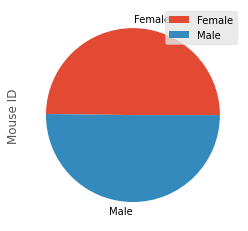

In [353]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
without_duplicate_mouse.groupby(["Sex"]).nunique().plot.pie(y="Mouse ID")


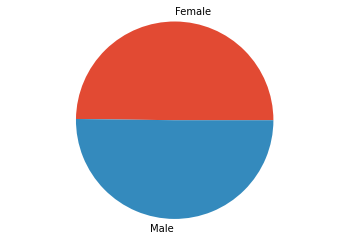

In [354]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Female', 'Male'
Numbers = [124, 125]  

fig1, ax1 = plt.subplots()
ax1.pie(Numbers, labels=labels)
ax1.axis('equal')  

plt.show() 

## Quartiles, Outliers and Boxplots

In [355]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#timepoint=without_duplicate_mouse["Timepoint"].unique()
#print(timepoint)

Capomulin_mouse=without_duplicate_mouse[(without_duplicate_mouse["Drug Regimen"]=='Capomulin')&(without_duplicate_mouse["Timepoint"]==45)]
#print(Capomulin_mouse)

Capomulin_mouse_tumor_size=Capomulin_mouse["Tumor Volume (mm3)"]
print(Capomulin_mouse_tumor_size)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


19     23.343598
29     28.484033
39     28.430964
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
204    37.311846
224    36.041047
244    37.074024
282    38.846876
299    38.939633
309    38.982878
337    38.125164
350    40.658124
360    40.159220
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64


In [356]:
Ramicane_mouse=without_duplicate_mouse[(without_duplicate_mouse["Drug Regimen"]=='Ramicane')&(without_duplicate_mouse["Timepoint"]==45)]
#print(Ramicane_mouse)

Ramicane_mouse_tumor_size=Ramicane_mouse["Tumor Volume (mm3)"]
print(Ramicane_mouse_tumor_size)

9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
94     31.560470
114    31.095335
154    33.397653
174    32.978522
184    33.562402
194    36.134852
214    38.810366
234    37.225650
254    36.374510
272    37.311236
327    38.407618
400    40.659006
410    40.667713
420    45.220869
430    43.047543
Name: Tumor Volume (mm3), dtype: float64


In [357]:
Infubinol_mouse=without_duplicate_mouse[(without_duplicate_mouse["Drug Regimen"]=='Infubinol')&(without_duplicate_mouse["Timepoint"]==45)]
#print(Infubinol_mouse)

Infubinol_mouse_tumor_size=Infubinol_mouse["Tumor Volume (mm3)"]
print(Infubinol_mouse_tumor_size)

463     67.973419
473     65.525743
540     66.083066
637     72.226731
800     62.435404
834     60.918767
1053    66.196912
1813    67.685569
1872    62.754451
Name: Tumor Volume (mm3), dtype: float64


In [358]:
Ceftamin_mouse=without_duplicate_mouse[(without_duplicate_mouse["Drug Regimen"]=='Ceftamin')&(without_duplicate_mouse["Timepoint"]==45)]
#print(Ceftamin_mouse)

Ceftamin_mouse_tumor_size=Ceftamin_mouse["Tumor Volume (mm3)"]
print(Ceftamin_mouse_tumor_size)

493     62.999356
993     61.849023
1033    68.923185
1112    67.748662
1132    59.851956
1162    64.299830
1260    59.741901
1379    61.433892
1670    67.527482
1773    64.634949
1797    61.386660
1845    68.594745
1855    64.729837
Name: Tumor Volume (mm3), dtype: float64


In [359]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments=[Capomulin, Ramicane, Infubinol, Ceftamin]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[Capomulin_mouse_tumor_size, Ramicane_mouse_tumor_size, Infubinol_mouse_tumor_size, Ceftamin_mouse_tumor_size]
print(tumor_volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=tumor_volume.quartile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[19     23.343598
29     28.484033
39     28.430964
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
204    37.311846
224    36.041047
244    37.074024
282    38.846876
299    38.939633
309    38.982878
337    38.125164
350    40.658124
360    40.159220
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64, 9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
94     31.560470
114    31.095335
154    33.397653
174    32.978522
184    33.562402
194    36.134852
214    38.810366
234    37.225650
254    36.374510
272    37.311236
327    38.407618
400    40.659006
410    40.667713
420    45.220869
430    43.047543
Name: Tumor Volume (mm3), dtype: float64, 463     67.973419
473     65.525743
540     66.083066
637     72.226731
800     62.435404
834     60.918767
1053    66.196912
1813    67.685569
1872    62.754451
Name: Tumor Volume (mm3), dtype: float64, 493     62.999

AttributeError: 'list' object has no attribute 'quartile'

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

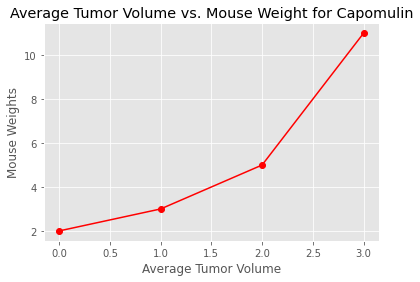

In [281]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = np.arange(0, len(tumor_volume))
mouse_weights = []
for x in x_axis:
    mouse_weights.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))    
    plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weights")

plt.plot(x_axis, mouse_weights, marker="o", color="red")
plt.show()

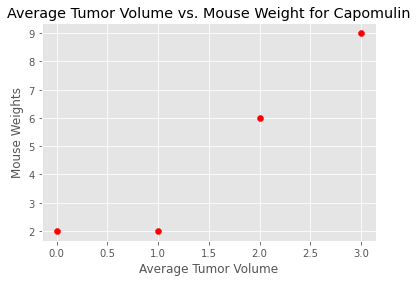

In [279]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = np.arange(0, len(tumor_volume))
mouse_weights = []
for x in x_axis:
    mouse_weights.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))    
    plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weights")

plt.scatter(x_axis, mouse_weights, marker="o", color="red")
plt.show()

## Correlation and Regression

In [282]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Average_Tumor_Volume=Capomulin_mouse_tumor_size
mouse_weight=mouse_weights
correlation=st.pearsonr(Average_Tumor_Volume,mouse_weights)
print(correlation)


ValueError: x and y must have the same length.

In [287]:
x_axis = np.arange(0, len(tumor_volume))
mouse_weights = []
(slope, intercept, rvalue, pvalue, stderr) = lineregress(x_axis, mouse_weights)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
for x in x_axis:
    mouse_weights.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))    
    plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weights")

plt.scatter(x_axis, mouse_weights, marker="o", color="red")
plt.show()

NameError: name 'lineregress' is not defined